#Data set:  
//raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


Import Libraries

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [7]:
data =pd.read_csv('/content/NSE-TATAGLOBAL.csv')
data=data. iloc[::-1]
data.head()



,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


Preprocessing the Data

In [9]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
data.shape

(2035, 8)

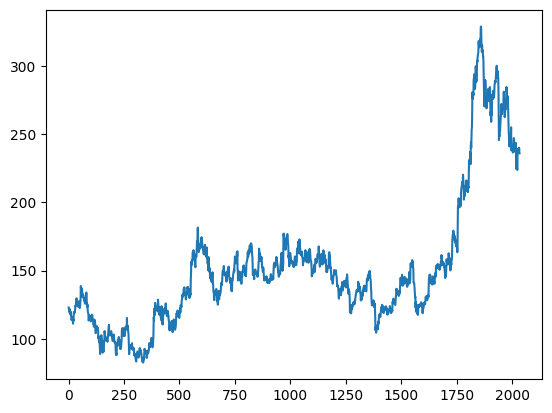

In [12]:
data_high=data.reset_index()['High']
plt.plot(data_high)

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))
data_high = scaler.fit_transform(np.array(data_high).reshape(-1,1))

In [14]:
data_high.shape

(2035, 1)

In [15]:
data_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

Split Data

In [16]:
training_size = int(len(data_high) * 0.75)
test_size = len(data_high) - training_size
train_data, test_data = data_high[0:training_size,:], data_high[training_size:len(data_high),:1]


In [17]:
training_size,test_size

(1526, 509)

In [21]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_input_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape), print(Y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [23]:
print(X_test.shape), print(Y_test.shape)

(408, 100)
(408,)


(None, None)

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 11s 241ms/step - loss: 0.0093 - val_loss: 0.0278
Epoch 2/100
23/23 [==============================] - 6s 248ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 3/100
23/23 [==============================] - 4s 197ms/step - loss: 9.0019e-04 - val_loss: 0.0047
Epoch 4/100
23/23 [==============================] - 5s 207ms/step - loss: 8.3346e-04 - val_loss: 0.0057
Epoch 5/100
23/23 [==============================] - 5s 200ms/step - loss: 7.9617e-04 - val_loss: 0.0049
Epoch 6/100
23/23 [==============================] - 4s 174ms/step - loss: 7.7386e-04 - val_loss: 0.0038
Epoch 7/100
23/23 [==============================] - 4s 193ms/step - loss: 7.3230e-04 - val_loss: 0.0047
Epoch 8/100
23/23 [==============================] - 5s 209ms/step - loss: 7.0977e-04 - val_loss: 0.0041
Epoch 9/100
23/23 [==============================] - 4s 189ms/step - loss: 6.7472e-04 - val_loss: 0.0059
Epoch 10/100
23/23 [==============================] - 7s 312ms

In [27]:
# Reshape X_test correctly to a 3D tensor
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Now predict using the reshaped X_test
test_predict = model.predict(X_test)

13/13 [==============================] - 0s 36ms/step


In [32]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [33]:
math.sqrt(mean_squared_error(y_train, train_predict))

33618.85427396275

In [34]:
math.sqrt(mean_squared_error(y_test, test_predict))

55707.41303835789

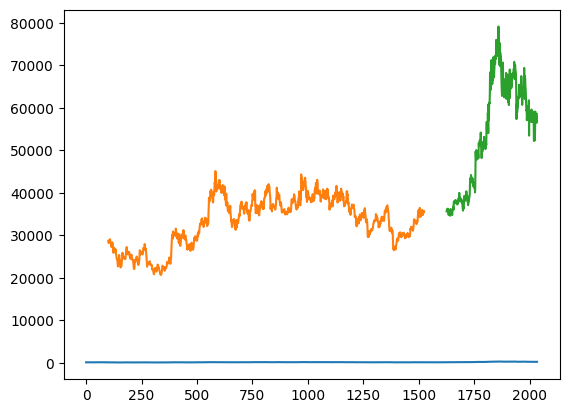

Green-Predicted Data
Blue-Complete Data
Orange-Train Data


In [36]:
#train prediction
look_back = 100
trainPredictPlot = np.empty_like(data_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#test prediction
testPredictPlot = np.empty_like(data_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green-Predicted Data")
print("Blue-Complete Data")
print("Orange-Train Data")

In [37]:
len(test_data), X_test.shape

(509, (408, 100, 1))

In [38]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape

(1, 100)

In [39]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):

    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        y = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,y))
        temp_input.extend(y[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(y.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        y= model.predict(X_input, verbose=0)
        print(y[0])
        temp_input.extend(y[0].tolist())
        print(len(temp_input))
        lst_output.extend(y.tolist())
        i=i+1


print(lst_output)

[0.604052]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0.

In [40]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [41]:
day_new.shape

(100,)

In [42]:
day_pred.shape

(28,)

In [43]:
data3 = data_high.tolist()
data3.extend(lst_output)

len(data_high)

2035

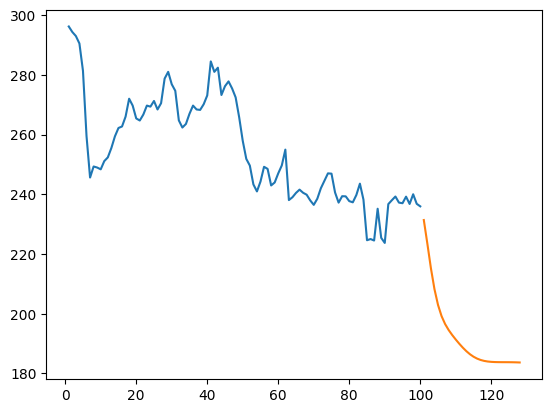

In [44]:
plt.plot(day_new, scaler.inverse_transform(data_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

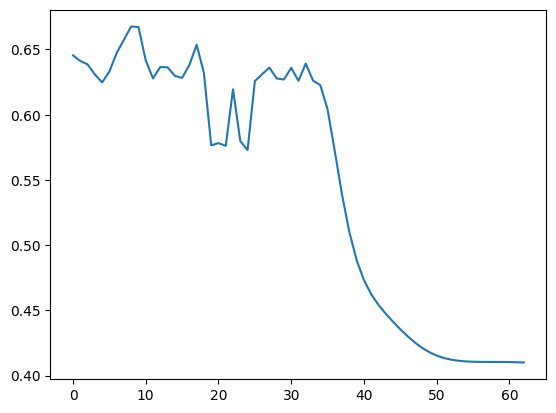

In [45]:
data3=data_high.tolist()
data3.extend(lst_output)
plt.plot(data3[2000:])

In [46]:
data3=scaler.inverse_transform(data3).tolist()

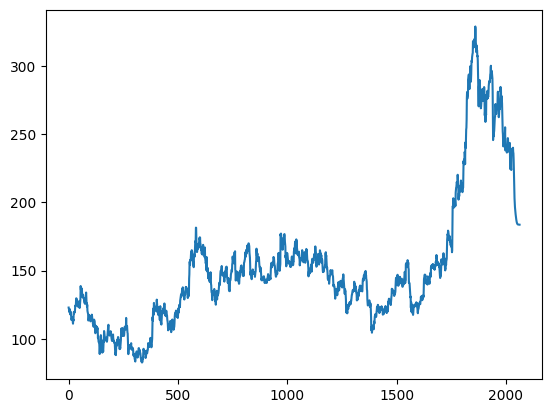

In [47]:
plt.plot(data3)